In [1]:
import numpy as np
import pandas as pd 
from PIL import Image
from tqdm import tqdm
import os

In [2]:
def atoi(s):
    n = 0
    for i in s:
        n = n*10 + ord(i) - ord("0")
    return n

In [3]:
outer_names = ['test','train']
inner_names = ['happy', 'sad']
os.makedirs('data', exist_ok=True)
for outer_name in outer_names:
    os.makedirs(os.path.join('data',outer_name), exist_ok=True)
    for inner_name in inner_names:
        os.makedirs(os.path.join('data',outer_name,inner_name), exist_ok=True)

In [4]:
happy = 0
sad = 0
happy_test = 0
sad_test = 0

In [5]:
df = pd.read_csv('fer2013_only happy n sad.csv')
mat = np.zeros((48,48),dtype=np.uint8)
print("Saving images...")

Saving images...


In [6]:
for i in tqdm(range(len(df))):
    txt = df['pixels'][i]
    words = txt.split()
    
    # the image size is 48x48
    for j in range(2304):
        xind = j // 48
        yind = j % 48
        mat[xind][yind] = atoi(words[j])

    img = Image.fromarray(mat)

    # train
    if i < 10000:
        if df['emotion'][i] == 0:
            img.save('train/happy/im'+str(happy)+'.png')
            happy += 1
        elif df['emotion'][i] == 1:
            img.save('train/sad/im'+str(sad)+'.png')
            sad += 1

    # test
    else:
        if df['emotion'][i] == 0:
            img.save('test/happy/im'+str(happy_test)+'.png')
            happy_test += 1
        elif df['emotion'][i] == 1:
            img.save('test/sad/im'+str(sad_test)+'.png')
            sad_test += 1

print("Done!")

100%|███████████████████████████████████████████████████████████████████████████| 15064/15064 [01:58<00:00, 127.32it/s]


Done!


In [6]:
import numpy as np
import argparse
import matplotlib.pyplot as plt
import cv2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

In [7]:
def plot_model_history(model_history):
    """
    Plot Accuracy and Loss curves given the model_history
    """
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['accuracy'])+1),model_history.history['accuracy'])
    axs[0].plot(range(1,len(model_history.history['val_accuracy'])+1),model_history.history['val_accuracy'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['accuracy'])+1),len(model_history.history['accuracy'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    fig.savefig('plot.png')
    plt.show()

In [8]:
train_dir = 'train'
val_dir = 'test'

num_train = 10000
num_val = 5064
batch_size = 32
num_epoch = 30

train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(48,48),
        batch_size=batch_size,
        color_mode="grayscale",
        class_mode='categorical')

validation_generator = val_datagen.flow_from_directory(
        val_dir,
        target_size=(48,48),
        batch_size=batch_size,
        color_mode="grayscale",
        class_mode='categorical')

Found 10000 images belonging to 2 classes.
Found 5064 images belonging to 2 classes.


In [9]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(48,48,1)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='sigmoid'))

In [10]:
 model.compile(loss='binary_crossentropy',optimizer=Adam(learning_rate=0.0001, decay=1e-6),metrics=['accuracy'])

Epoch 1/30
185/312 [================>.............] - ETA: 7:35 - loss: 0.6950 - accuracy: 0.37 - ETA: 2:45 - loss: 0.6916 - accuracy: 0.51 - ETA: 2:47 - loss: 0.6907 - accuracy: 0.52 - ETA: 2:43 - loss: 0.6874 - accuracy: 0.54 - ETA: 2:26 - loss: 0.6863 - accuracy: 0.55 - ETA: 2:16 - loss: 0.6866 - accuracy: 0.55 - ETA: 2:11 - loss: 0.6845 - accuracy: 0.55 - ETA: 2:07 - loss: 0.6839 - accuracy: 0.55 - ETA: 2:04 - loss: 0.6829 - accuracy: 0.56 - ETA: 2:01 - loss: 0.6816 - accuracy: 0.56 - ETA: 1:58 - loss: 0.6811 - accuracy: 0.57 - ETA: 1:55 - loss: 0.6776 - accuracy: 0.57 - ETA: 1:54 - loss: 0.6816 - accuracy: 0.57 - ETA: 1:51 - loss: 0.6801 - accuracy: 0.57 - ETA: 1:51 - loss: 0.6794 - accuracy: 0.57 - ETA: 1:50 - loss: 0.6800 - accuracy: 0.57 - ETA: 1:49 - loss: 0.6798 - accuracy: 0.57 - ETA: 1:48 - loss: 0.6788 - accuracy: 0.57 - ETA: 1:47 - loss: 0.6780 - accuracy: 0.57 - ETA: 1:45 - loss: 0.6779 - accuracy: 0.57 - ETA: 1:44 - loss: 0.6772 - accuracy: 0.58 - ETA: 1:44 - loss: 0.67

C:\Users\Arshiya\.anaconda\lib\site-packages\ipykernel_launcher.py:12: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  if sys.path[0] == '':
C:\Users\Arshiya\.anaconda\lib\site-packages\ipykernel_launcher.py:20: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.


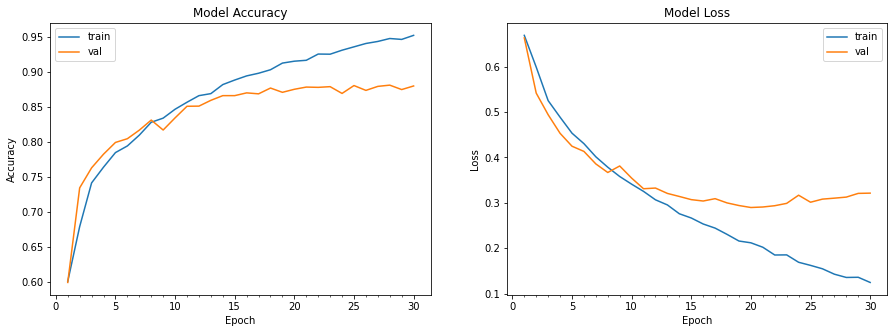

In [11]:
model_info = model.fit(train_generator,
            steps_per_epoch=num_train // batch_size,
            epochs=num_epoch,
            validation_data=validation_generator,
            validation_steps=num_val // batch_size)

In [16]:
 model.save_weights('model.h5')

In [17]:
model.save('model1.h5')